<h1><center>BUAN 6341 - Project</center></h1>
<h1><center>Uncovering the Secret to Diabetes: Predicting Your Chances by Identifying the Key Factors</center></h1> 

#### Name: Harigovind Padmarajan
#### Course: 

## Context

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

`diabetes _ binary _ health _ indicators _ BRFSS2015.csv` is a dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

#### About Columns :

`Diabetes_binar` : you have diabetes (0,1Diabetes_binary : you have diabetes (0,1)

`HighB` : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

`HighChol` : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1HighChol : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

`holCheck` : Cholesterol check within past five years (0,1)

`BMI`: Body Mass Index (BMI)

`Smoke` : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

`Stroke` : (Ever told) you had a stroke. (0,1)

`HeartDiseaseorAttac` : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

`PhysActivit` : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

`Fruits`: Consume Fruit 1 or more times per day (0,1)

`Veggies` : Consume Vegetables 1 or more times per day (0,1)

`HvyAlcoholConsump` : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

`AnyHealthcare` : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

`NoDocbcCost` : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

`GenHlth` : Would you say that in general your health is: rate (1 ~ 5)

`MentHlth` : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

`PhysHlth` : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

`DiffWalk` : Do you have serious difficulty walking or climbing stairs? (0,1)

`Sex` : Indicate sex of respondent (0,1) (Female or Male)

`Age` : Fourteen-level age category (1 ~ 14)

`Education` : What is the highest grade or year of school you completed? (1 ~ 6)

`Income` : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

## Questions

These are some of the questions that I'm trying to answer through this project:

1. Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?
2. What risk factors are most predictive of diabetes risk?
3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
4. Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns
from math import pi

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import math
from sklearn.metrics import plot_confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("C:\\Users\\harig\\OneDrive - The University of Texas at Dallas\\Spring 2023\\AIML\\Project\\diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Descriptive Analysis and Data Cleaning

In [3]:
df.shape

(253680, 22)

In [4]:
# Summary Statistics
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
# Checking for null values in the dataset
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
#checking unique values in different variables

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_binary,2
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [7]:
# Checking duplicates rows in dataset df1 to eliminate them

duplicates = df[df.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


result shows that there is 24206 duplicate rows in dataset. 

In [8]:
# eliminating 24206 duplicate rows from the dataset df1
df.drop_duplicates(inplace = True)
df.shape

(229474, 22)

## Exploratory Data Analysis

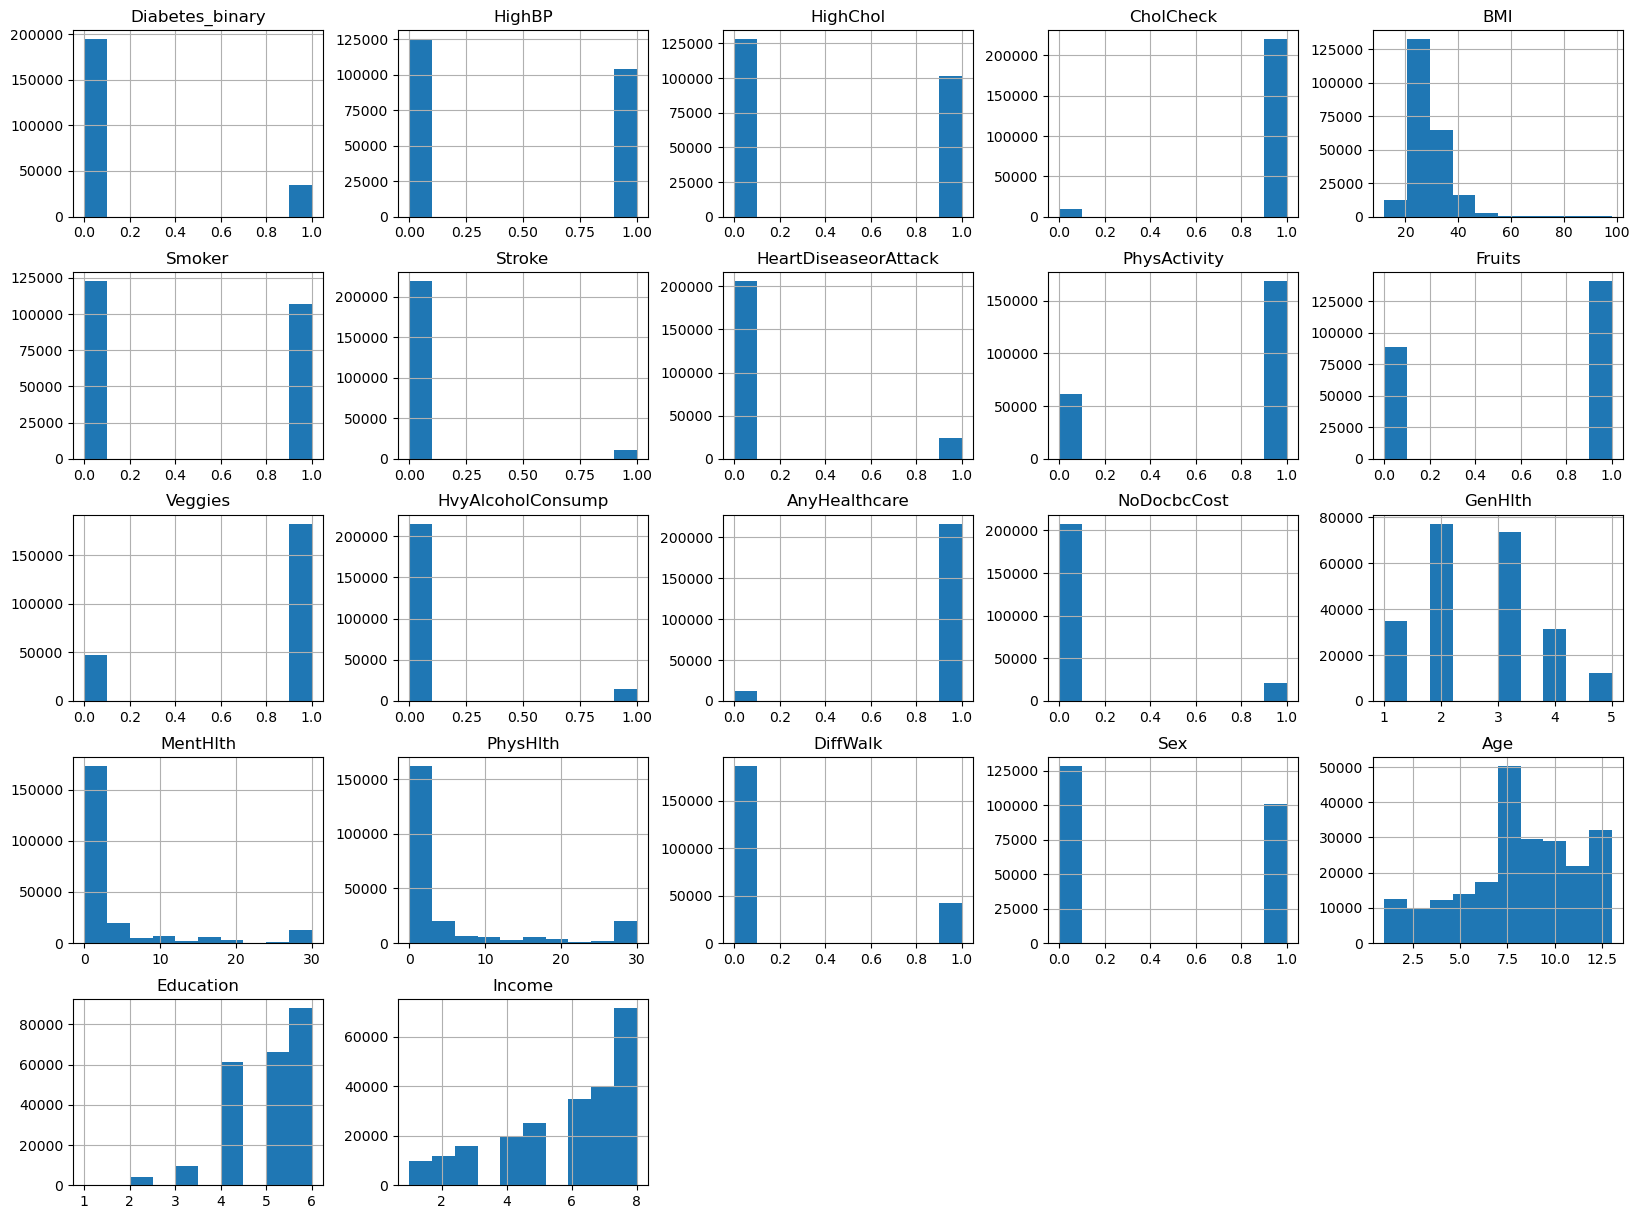

In [9]:
#using histogram to understand dataset better

df.hist(figsize=(20,15));

#### Observations:

1. There are 21 variables in the data
2. 15 of them are categorical variables (this includes the `Diabetes_binary` column the dependent variable)
3. 7 of them are numerical variables

## One Hot Encoding

In [10]:
df_new = pd.get_dummies(df, columns=['Income', 'Education', 'GenHlth', 'Age'],drop_first = True)
df_new.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0


count    229474.000000
mean         28.687507
std           6.789204
min          12.000000
25%          24.000000
50%          27.000000
75%          32.000000
max          98.000000
Name: BMI, dtype: float64


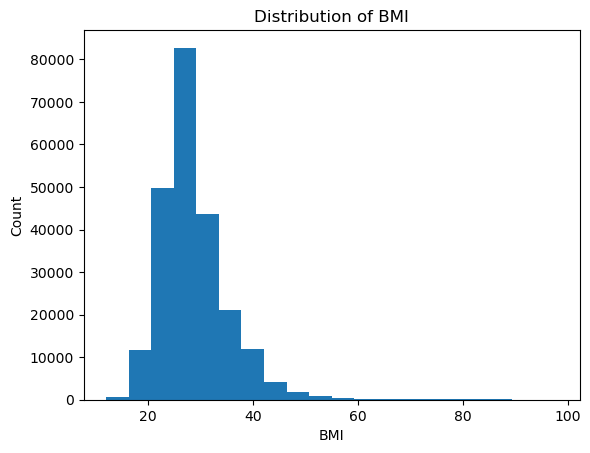

In [11]:
# Get descriptive statistics for the "BMI" column
bmi_stats = df['BMI'].describe()
print(bmi_stats)

# Plot a histogram of the "BMI" column
plt.hist(df['BMI'], bins=20)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('Distribution of BMI')
plt.show()

We can see that the distribution of the `BMI` is  not evenly distributed around the mean and is positively skewed. Taking a log transformation to see if the distribution improves. 

In [12]:
# Apply natural logarithm transformation to "BMI" column
df['log_BMI'] = np.log(df['BMI'])

# View the first few rows of the transformed DataFrame
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,log_BMI
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0,3.688879
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0,3.218876
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0,3.332205
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0,3.295837
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0,3.178054


count    229474.000000
mean          3.332419
std           0.213773
min           2.484907
25%           3.178054
50%           3.295837
75%           3.465736
max           4.584967
Name: log_BMI, dtype: float64


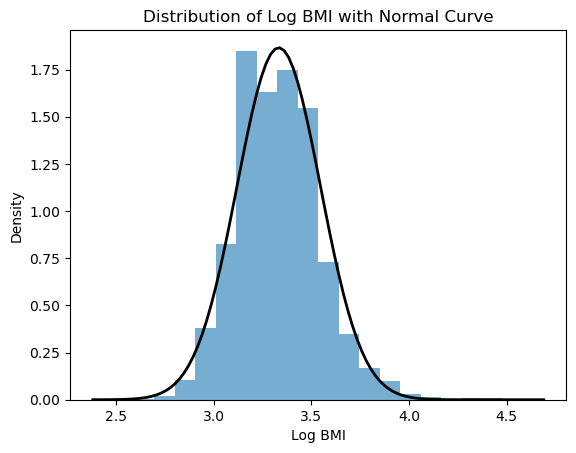

In [13]:
# Get descriptive statistics for the "BMI" column
bmi_stats = df['log_BMI'].describe()
print(bmi_stats)

# Plot histogram of transformed "BMI" column with normal curve
mu, std = norm.fit(df['log_BMI'])
plt.hist(df['log_BMI'], bins=20, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Log BMI')
plt.ylabel('Density')
plt.title('Distribution of Log BMI with Normal Curve')
plt.show()

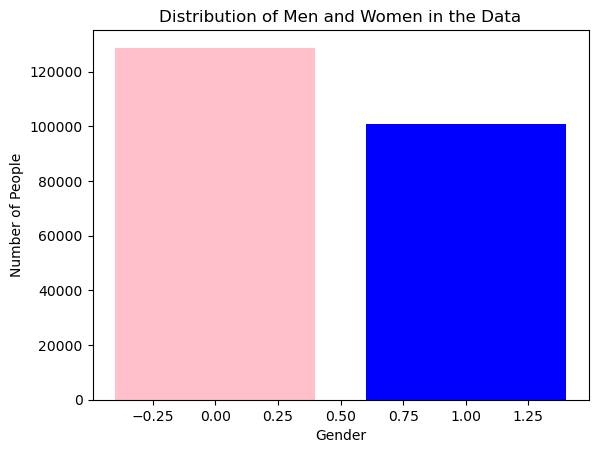

In [14]:
# Count number of men and women in the data
gender_counts = df['Sex'].value_counts()

# Define colors for bars based on gender
colors = ['pink', 'blue']

# Create bar chart of gender distribution
fig, ax = plt.subplots()
ax.bar(gender_counts.index, gender_counts, color=colors)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_title('Distribution of Men and Women in the Data')
plt.show()

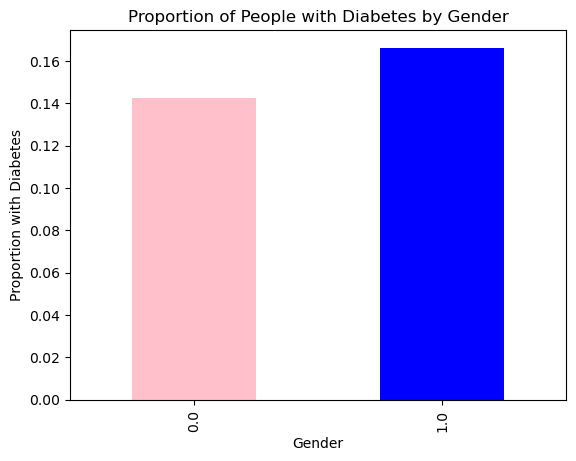

In [15]:
# Calculate proportion of people with diabetes by gender
diabetes_by_gender = df.groupby('Sex')['Diabetes_binary'].mean()

# Define colors for bars based on gender
colors = ['pink', 'blue']

# Plot bar graph of diabetes by gender
diabetes_by_gender.plot(kind='bar',  color=colors)
plt.xlabel('Gender')
plt.ylabel('Proportion with Diabetes')
plt.title('Proportion of People with Diabetes by Gender')
plt.show()

From the above two plots we can see that even though we have more data points for women, there is a slightly less  women have a slighlty lower chance for getting diabetes than men

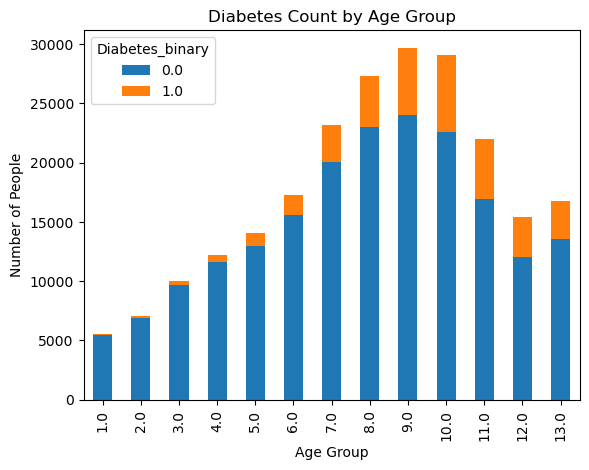

In [16]:
# Group data by age group and diabetes status and count number of people in each group
age_groups = df.groupby(['Age', 'Diabetes_binary'])['Diabetes_binary'].count().unstack()

# Create stacked bar chart of age group and diabetes count
fig, ax = plt.subplots()
age_groups.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Age Group')
ax.set_ylabel('Number of People')
ax.set_title('Diabetes Count by Age Group')
plt.show()

#### We can observe the following the above graph:

1. We surveyed more eople in the age group 7,8,9,10. 
2. The risk of diabetes increases with age as expected
3. since there is a small percentage of people in group 1 with diabetes which are childeren under the age of 13, it would be interesting to see what are the factors that contributred


In [17]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'log_BMI'],
      dtype='object')

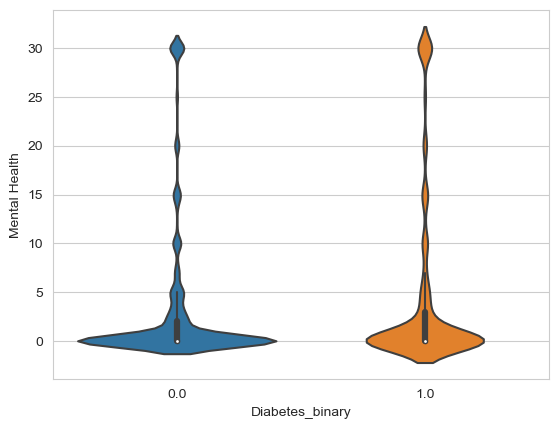

In [18]:
sns.set_style('whitegrid')

# create a violin plot
sns.violinplot(x='Diabetes_binary', y='MentHlth', data=df)

# set x and y labels
plt.xlabel('Diabetes_binary')
plt.ylabel('Mental Health')

# show the plot
plt.show()

#### From this plot it appears that there is no direct impact for mental health to the chances of developing diabetes

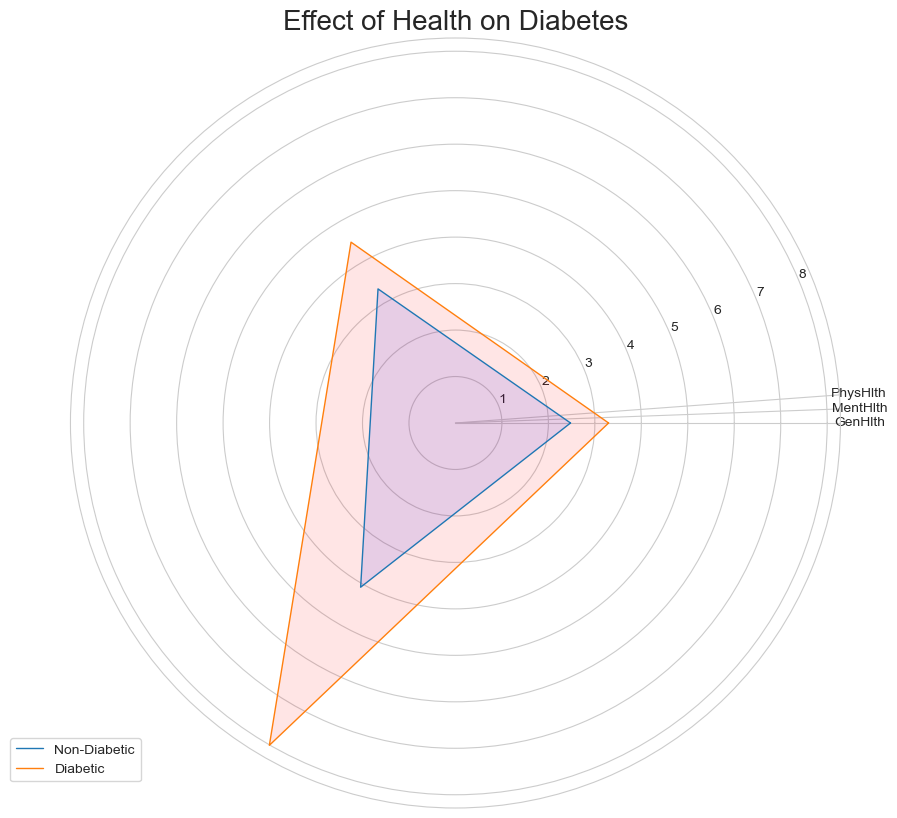

In [19]:
# Select the columns of interest
columns = ['GenHlth', 'MentHlth', 'PhysHlth', 'Diabetes_binary']

# Subset the DataFrame
df_sub = df[columns]

# Calculate the mean of each column by diabetes status
df_mean = df_sub.groupby('Diabetes_binary').mean()

# Define the categories and angles for the spider plot
categories = df_mean.columns
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

# Initialize the spider plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, polar=True)

# Plot the data for non-diabetic individuals
values = df_mean.loc[0].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Non-Diabetic')

# Plot the data for diabetic individuals
values = df_mean.loc[1].tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='Diabetic')

# Fill in the area under the curve for non-diabetic individuals
values = df_mean.loc[0].tolist()
values += values[:1]
ax.fill(angles, values, 'b', alpha=0.1)

# Fill in the area under the curve for diabetic individuals
values = df_mean.loc[1].tolist()
values += values[:1]
ax.fill(angles, values, 'r', alpha=0.1)

# Set the labels for the spider plot
ax.set_thetagrids(angles[:-1], categories)
ax.set_title('Effect of Health on Diabetes', fontsize=20)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()

#### As expected people with higher physical, mental and general health have a lower chnace of developing diabetes

## Checking for Correlation

In [20]:
#checking correlation between columns of dataset df1 

df.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,log_BMI
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.205086,0.045504,0.099193,0.168213,-0.100404,-0.024805,...,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659,0.215207
HighBP,0.254318,1.000000,0.283963,0.111259,0.194218,0.074264,0.124558,0.201443,-0.104382,-0.019467,...,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030,0.211676
HighChol,0.194944,0.283963,1.000000,0.094772,0.089734,0.074583,0.089375,0.176446,-0.063443,-0.026257,...,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089,0.105255
CholCheck,0.072523,0.111259,0.094772,1.000000,0.042487,-0.003721,0.027955,0.050086,-0.004555,0.017860,...,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989,0.046490
BMI,0.205086,0.194218,0.089734,0.042487,1.000000,-0.009294,0.011006,0.039820,-0.127780,-0.067424,...,0.045795,0.208351,0.068569,0.102768,0.182556,0.030902,-0.049223,-0.074433,-0.069097,0.977578
Smoker,0.045504,0.074264,0.074583,-0.003721,-0.009294,1.000000,0.054414,0.105169,-0.066869,-0.061731,...,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314,-0.007589
Stroke,0.099193,0.124558,0.089375,0.027955,0.011006,0.054414,1.000000,0.198814,-0.059306,-0.004486,...,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108,0.011028
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.039820,0.105169,0.198814,1.000000,-0.073094,-0.006946,...,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728,0.044648
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.127780,-0.066869,-0.059306,-0.073094,1.000000,0.125023,...,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869,-0.127764
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.067424,-0.061731,-0.004486,-0.006946,0.125023,1.000000,...,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907,-0.071305


Text(0.5, 1.0, 'correlation of feature')

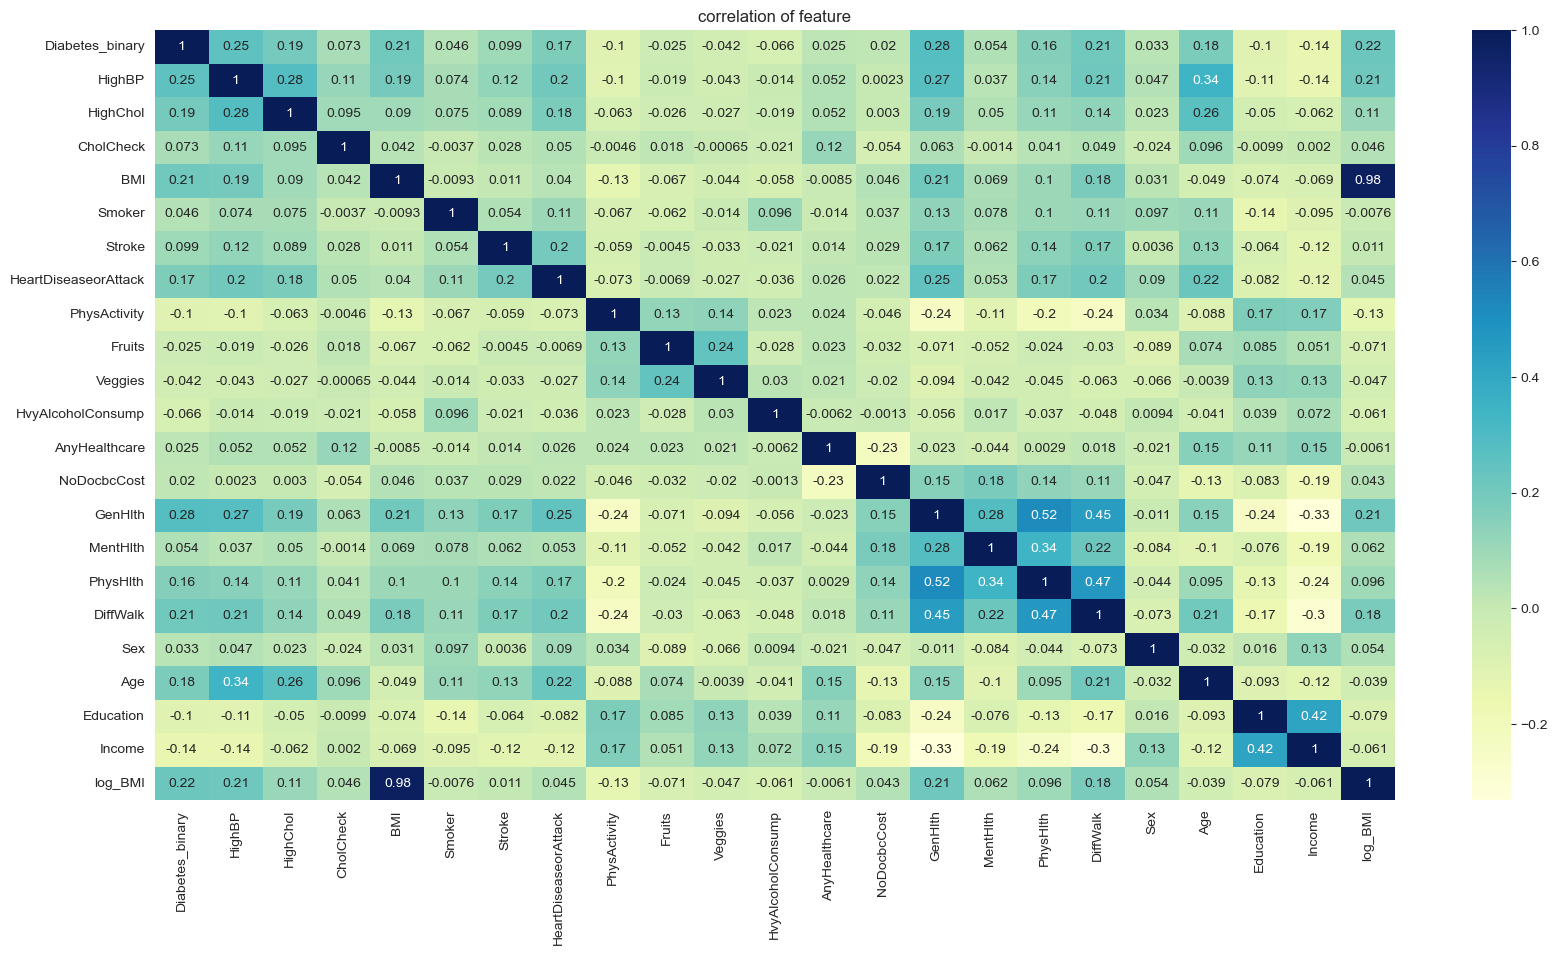

In [21]:
#using heatmap to understand correlation better in dataset df1 
#Heatmap of correlation


plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True , cmap ='YlGnBu' )
plt.title("correlation of feature")

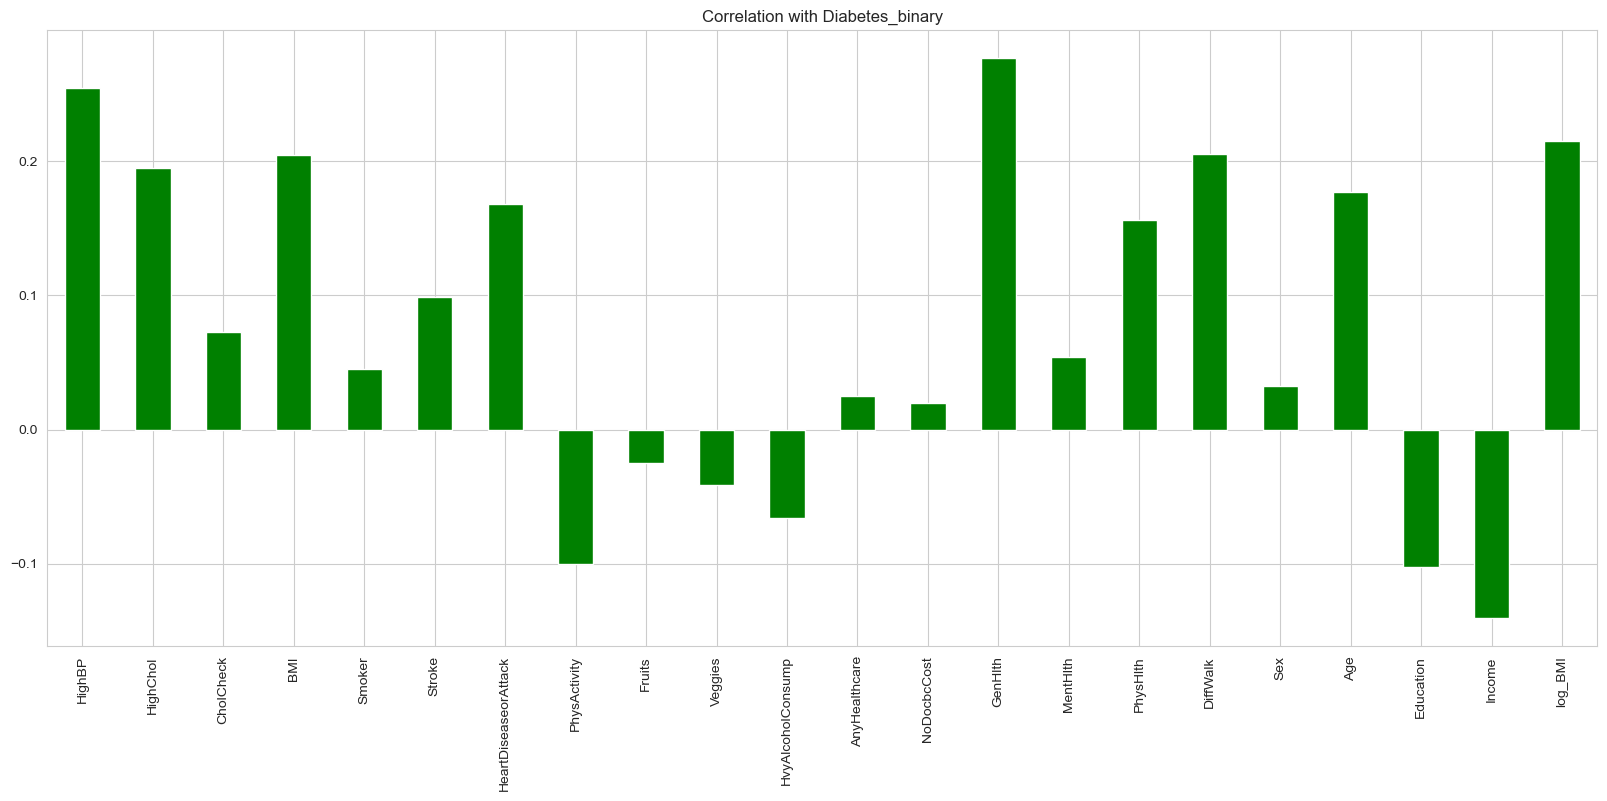

In [22]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8)
, title="Correlation with Diabetes_binary",color="green");

#### Comparing the correation graphs above, we can conclude the following:

1. `Fruits`, `AnyHealthcare` , `NoDocbccost` and `sex` are least correlated with Diabetes_binary.

2. `HighBP` , `HighChol` , `BMI` , `smoker` , `stroke` , `HeartDiseaseorAttack` , `PhysActivity` , `Veggies` , `HvyAlcoholconsump` , `GenHlth` , `PhysHlth` , `Age` , `Education` , `Income` and `DiffWalk` have a significant correlation with Diabetes_binary.
3. It is interesting how the analysis of gender showed a different result from the correlation plot

<center><h1><font color='blue'>Predictive Modelling </font></h1></center>

<center><h1><font color='blue'>Approach 1: Direct </font></h1></center>

## Logitic Regression 

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [24]:
X = df_new.drop('Diabetes_binary', axis=1)
y = df_new['Diabetes_binary']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# fit the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predict the test set
y_pred = lr.predict(X_test)

# evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

C:\Users\harig\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.853600610088245
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     38945
         1.0       0.57      0.14      0.23      6950

    accuracy                           0.85     45895
   macro avg       0.72      0.56      0.57     45895
weighted avg       0.82      0.85      0.81     45895



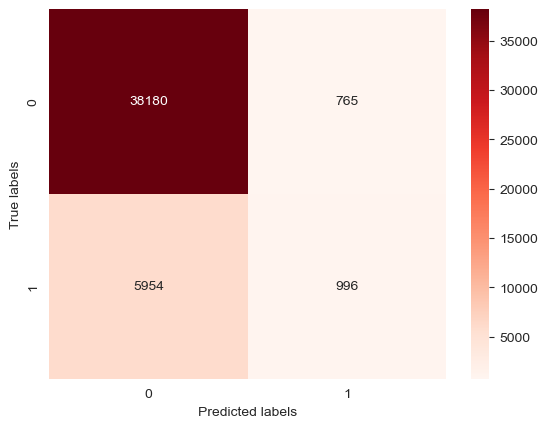

In [25]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [26]:
# # print significant coefficients
# significant_vars = []
# for i in range(len(lr.pvalues)):
#     if lr.pvalues[i] < 0.05:
#         significant_vars.append(lr.params.index[i])

# significant_vars

## Decison Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

X = df_new.drop('Diabetes_binary', axis=1)
y = df_new['Diabetes_binary']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# create the decision tree classifier
dtc = DecisionTreeClassifier()

# define the hyperparameters to tune
param_grid = {'max_depth': range(2, 10),
              'min_samples_split': range(2, 10)}

# perform grid search cross-validation
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_

# fit the model with best parameters
dtc = DecisionTreeClassifier(**best_params)
dtc.fit(X_train, y_train)

# predict on test set
y_pred = dtc.predict(X_test)

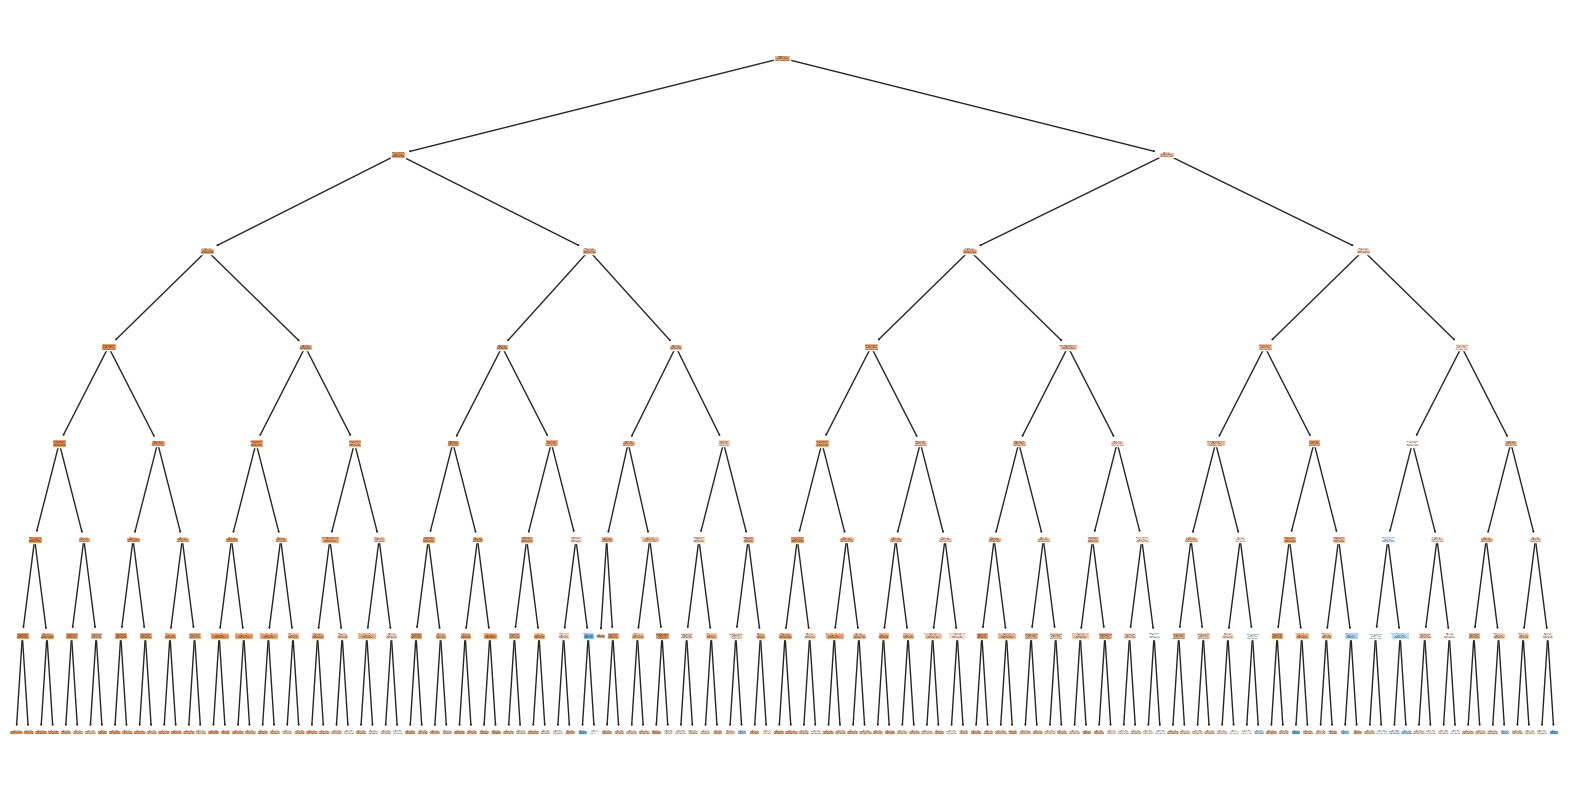

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=X_train.columns, filled=True)
plt.show()

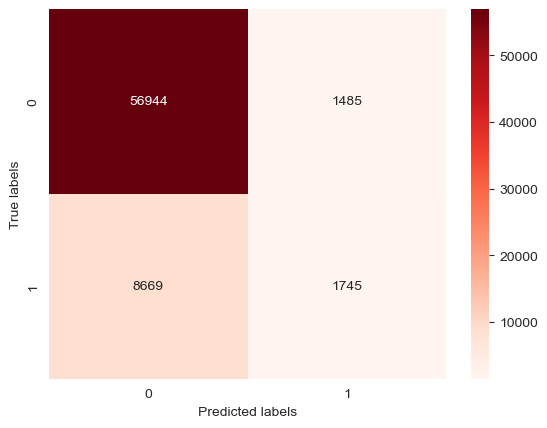

In [29]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [30]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Classification Report:\n', report)
print('Confusion Matrix:\n', confusion)

Accuracy: 85.25%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58429
         1.0       0.54      0.17      0.26     10414

    accuracy                           0.85     68843
   macro avg       0.70      0.57      0.59     68843
weighted avg       0.82      0.85      0.82     68843

Confusion Matrix:
 [[56944  1485]
 [ 8669  1745]]


## Random Forest Classifier 

In [31]:
X = df_new.drop('Diabetes_binary', axis=1)
y = df_new['Diabetes_binary']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
# Train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 84.43%


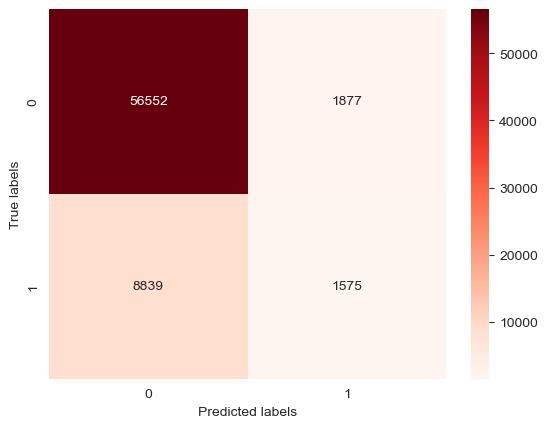

In [32]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## ADA Boost (Boosting)

In [33]:
# Create an AdaBoost model
ada = AdaBoostClassifier(n_estimators=100, random_state=21)
ada.fit(X_train, y_train)

# Make predictions on the test data and print the model performance
y_pred = ada.predict(X_test)
print("AdaBoost Accuracy Score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

AdaBoost Accuracy Score:  0.8542190200891885
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     58429
         1.0       0.56      0.18      0.27     10414

    accuracy                           0.85     68843
   macro avg       0.71      0.58      0.60     68843
weighted avg       0.82      0.85      0.82     68843

[[56910  1519]
 [ 8517  1897]]


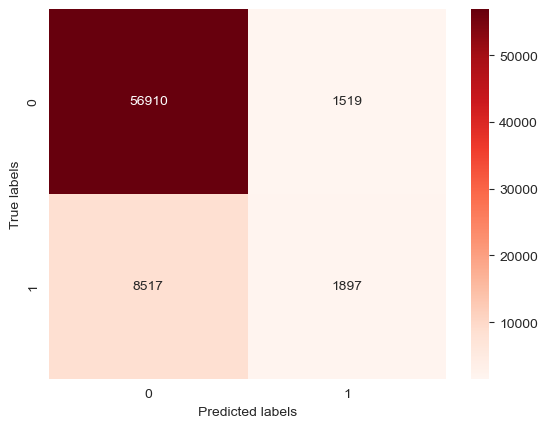

In [34]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<center><h1><font color='blue'>Approach 2: Oversampling </font></h1></center>

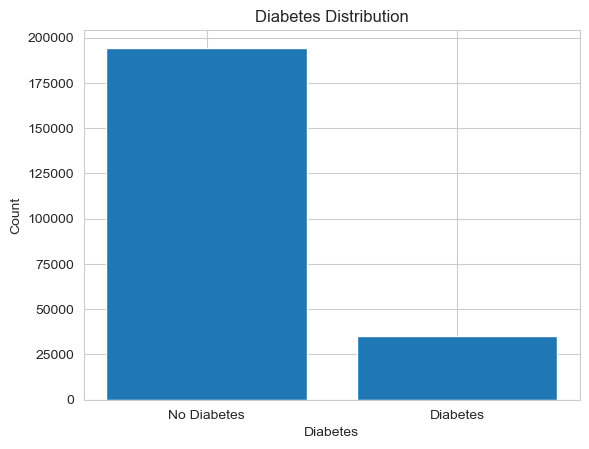

In [35]:
diabetes_counts = df['Diabetes_binary'].value_counts()

plt.bar(diabetes_counts.index, diabetes_counts.values)
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Diabetes Distribution')
plt.show()

In [36]:
diabetes_counts = df['Diabetes_binary'].value_counts()
diabetes_counts

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

### Motivation for Oversampling 

The motivation behind using oversampling techniques for this particular dataset is to address the issue of imbalanced class distribution. 

In this dataset, the number of instances belonging to the negative class (i.e., individuals without diabetes) significantly outweighs the positive class (i.e., individuals with diabetes), with 194,377 instances belonging to the former class and only 35,097 belonging to the latter. 

This skewed class distribution can lead to poor model performance and an increased likelihood of false negatives. 

By oversampling the minority class, we can increase the number of positive instances and achieve a more balanced dataset, which may result in improved model performance and better prediction accuracy.

<AxesSubplot:title={'center':'Label Distribution after Oversampling'}>

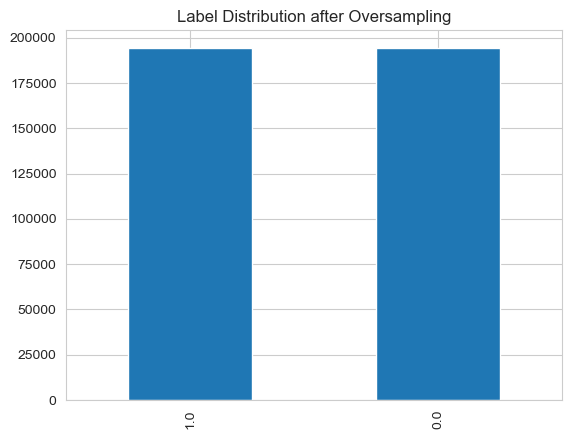

In [37]:
# Renaming the data frame as df_os
df_os = df_new.copy()

# over sampling of the dataset to get a balanced dataset
class_0 = df_os[df_os['Diabetes_binary'] == 0]
class_1 = df_os[df_os['Diabetes_binary'] == 1]

# over sampling of the minority class 1
class_1_over = class_1.sample(len(class_0), replace=True)

# Creating a new dataframe with over sampled class 1 df and class 0 df
df_os = pd.concat([class_1_over, class_0], axis=0)

# plotting the new label distribution
df_os['Diabetes_binary'].value_counts().plot(kind='bar', title='Label Distribution after Oversampling')


In [38]:
df_os.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Income_2.0', 'Income_3.0', 'Income_4.0',
       'Income_5.0', 'Income_6.0', 'Income_7.0', 'Income_8.0', 'Education_2.0',
       'Education_3.0', 'Education_4.0', 'Education_5.0', 'Education_6.0',
       'GenHlth_2.0', 'GenHlth_3.0', 'GenHlth_4.0', 'GenHlth_5.0', 'Age_2.0',
       'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0',
       'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0'],
      dtype='object')

In [39]:
df_os.head(3)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,Age_4.0,Age_5.0,Age_6.0,Age_7.0,Age_8.0,Age_9.0,Age_10.0,Age_11.0,Age_12.0,Age_13.0
73498,1.0,1.0,0.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,1
249660,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
12856,1.0,1.0,1.0,1.0,44.0,0.0,1.0,1.0,1.0,0.0,...,1,0,0,0,0,0,0,0,0,0


## Logitics Regression

In [40]:
X = df_os.drop('Diabetes_binary', axis=1)
y = df_os['Diabetes_binary']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# fit the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# predict the test set
y_pred = lr.predict(X_test)

# evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))

C:\Users\harig\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7311031369371455
Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72     38962
         1.0       0.72      0.76      0.74     38789

    accuracy                           0.73     77751
   macro avg       0.73      0.73      0.73     77751
weighted avg       0.73      0.73      0.73     77751



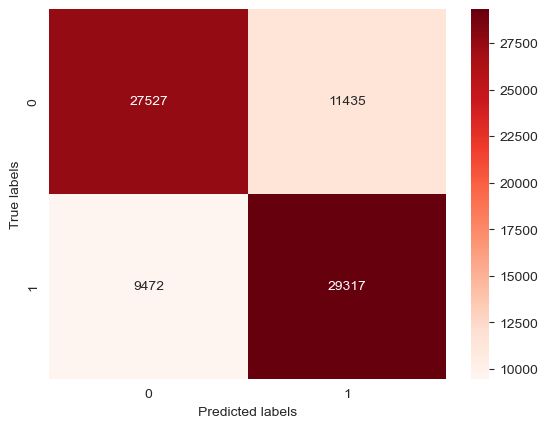

In [41]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Decision tree classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

X = df_os.drop('Diabetes_binary', axis=1)
y = df_os['Diabetes_binary']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

# create the decision tree classifier
dtc = DecisionTreeClassifier()

# define the hyperparameters to tune
param_grid = {'max_depth': range(2, 10),
              'min_samples_split': range(2, 10)}

# perform grid search cross-validation
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# get the best parameters
best_params = grid_search.best_params_

# fit the model with best parameters
dtc = DecisionTreeClassifier(**best_params)
dtc.fit(X_train, y_train)

# predict on test set
y_pred = dtc.predict(X_test)

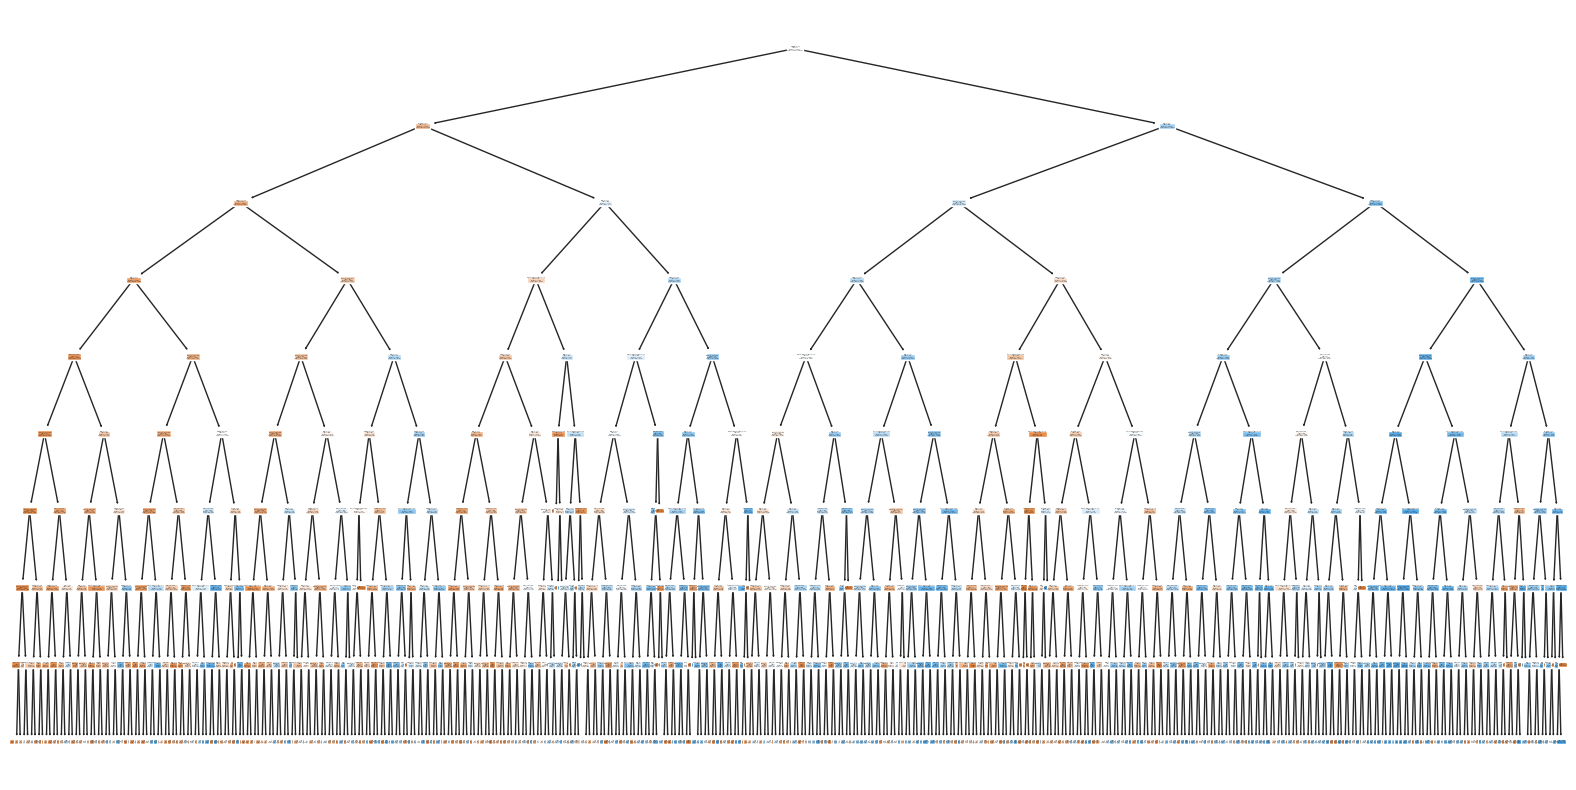

In [45]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, feature_names=X_train.columns, filled=True)
plt.show()

In [46]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy * 100))
print('Classification Report:\n', report)
print('Confusion Matrix:\n', confusion)

Accuracy: 72.74%
Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.68      0.72     58486
         1.0       0.71      0.77      0.74     58141

    accuracy                           0.73    116627
   macro avg       0.73      0.73      0.73    116627
weighted avg       0.73      0.73      0.73    116627

Confusion Matrix:
 [[39899 18587]
 [13200 44941]]


## Random Forest Classifier (Bagging)

In [47]:
X = df_os.drop('Diabetes_binary', axis=1)
y = df_os['Diabetes_binary']

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
# Train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=21)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 93.49%


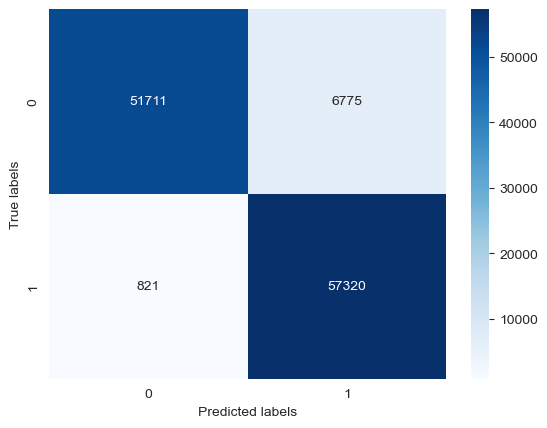

In [48]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

## Boosting using ADA Boost Algorithm 

In [49]:
# Create an AdaBoost model
ada = AdaBoostClassifier(n_estimators=100, random_state=21)
ada.fit(X_train, y_train)

# Make predictions on the test data and print the model performance
y_pred = ada.predict(X_test)
print("AdaBoost Accuracy Score: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

AdaBoost Accuracy Score:  0.7339466847299511
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     58486
         1.0       0.72      0.75      0.74     58141

    accuracy                           0.73    116627
   macro avg       0.73      0.73      0.73    116627
weighted avg       0.73      0.73      0.73    116627

[[41914 16572]
 [14457 43684]]


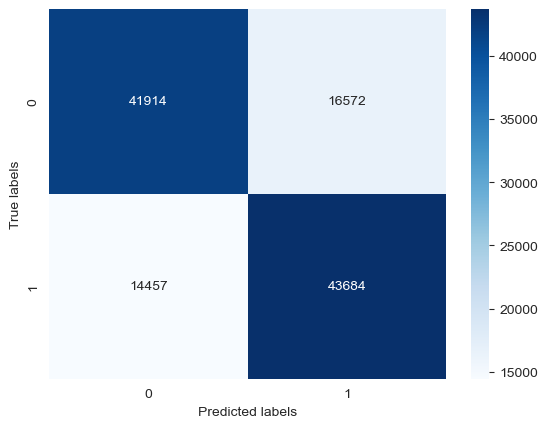

In [50]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [51]:
# Define the accuracies for each model and approach as variables
approach1_acc = {
    'Logistics Regression': 85.35,
    'Decision Tree': 85.25,
    'Random Forest': 84.43,
    'ADA Boost': 85.42
}

approach2_acc = {
    'Logistics Regression': 73.24,
    'Decision Tree': 72.59,
    'Random Forest': 93.51,
    'ADA Boost': 73.51
}

# Create a dictionary to store the accuracies for both approaches
accuracies_dict = {
    'Approach 1 (Direct Method)': approach1_acc,
    'Approach 2 (Oversampling Method)': approach2_acc
}
accuracies_dict

{'Approach 1 (Direct Method)': {'Logistics Regression': 85.35,
  'Decision Tree': 85.25,
  'Random Forest': 84.43,
  'ADA Boost': 85.42},
 'Approach 2 (Oversampling Method)': {'Logistics Regression': 73.24,
  'Decision Tree': 72.59,
  'Random Forest': 93.51,
  'ADA Boost': 73.51}}

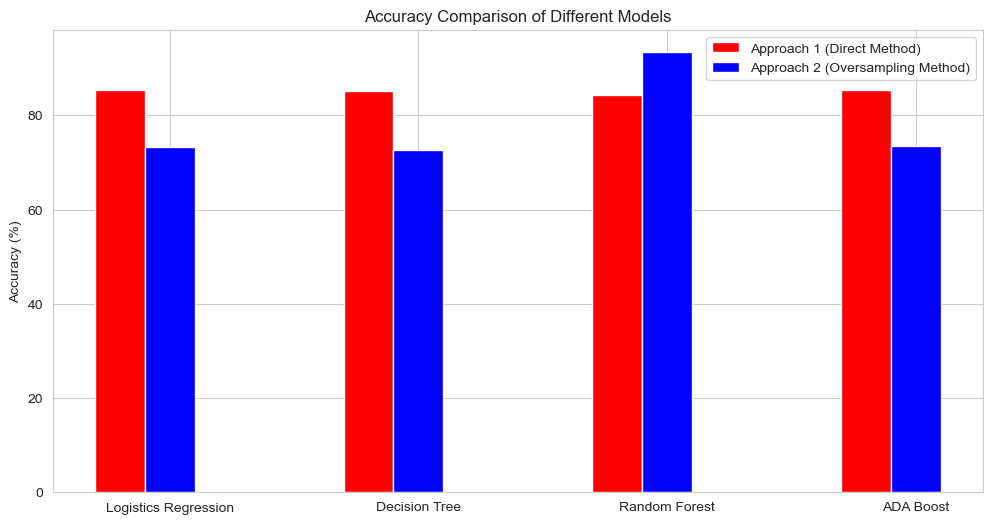

In [52]:
# Define a list of models
models = ['Logistics Regression', 'Decision Tree', 'Random Forest', 'ADA Boost']

# Define a list of colors for each approach
colors = ['red', 'blue']

# Define a figure with a size of 12x6
fig, ax = plt.subplots(figsize=(12,6))

# Loop through the accuracies for each approach
for i, (approach, accuracies) in enumerate(accuracies_dict.items()):
    # Create a list of accuracy values for the current approach
    accuracy_values = [accuracies[model] for model in models]
    
    # Plot a bar chart for the current approach
    ax.bar([x + i*0.2 for x in range(len(models))], accuracy_values, width=0.2, color=colors[i], label=approach)

# Set the x-axis labels to the list of models
ax.set_xticks([x + 0.2 for x in range(len(models))])
ax.set_xticklabels(models)

# Set the y-axis label to 'Accuracy (%)'
ax.set_ylabel('Accuracy (%)')

# Add a title to the chart
plt.title('Accuracy Comparison of Different Models')

# Add a legend to the chart
plt.legend()

# Display the chart
plt.show()

# Conclusion

The performance of four classification models was evaluated using two different approaches - the direct method and the oversampling method. Using the oversampling method, the Random Forest Classifier had the highest accuracy of 93.51%, while the ADA Boost Classifier had the highest accuracy of 85.42% using the direct method. 

The accuracies of all the models for both approaches are listed below:

**Approach 1 (Direct Method):**

- Logistics Regression Model – 85.35%
- Decision Tree Classifier – 85.25%
- Random Forest Classifier – 84.43%
- ADA Boost Classifier – 85.42%

**Approach 2 (Oversampling Method):**

- Logistics Regression Model - 73.24%
- Decision Tree Classifier – 72.59%
- Random Forest Classifier - 93.51%
- ADA Boost Classifier - 73.51%


The Random Forest Classifier using the oversampling approach had an accuracy of 93.51% and was selected as the final model.